# Linear SVC Examples

+ Using the Iris dataset

### Packages

In [1]:
%matplotlib inline
# data and plotting packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sn

# modeling packages
import scipy.stats as stats
from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from mlutils import plot_svc_decision_boundary

### Display Settings

In [2]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['legend.fontsize'] = 'x-large'
plt.rcParams['axes.labelsize'] = 'x-large'
plt.rcParams['axes.titlesize'] = 'x-large'
plt.rcParams['xtick.labelsize'] = 'x-large'
plt.rcParams['ytick.labelsize'] = 'x-large'

### Data Loading

In [3]:
# load the iris dataset from sklearn; note sklearn does not use pandas dataframes
iris = load_iris()
# anatomy of the data object
print("feature_names: {}".format(iris.feature_names))
print("feature_shape: {}".format(iris.data.shape))
print("target_names: {}".format(iris.target_names))
print("target_shape: {}".format(iris.target.shape))
#print(iris.DESCR)

feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
feature_shape: (150, 4)
target_names: ['setosa' 'versicolor' 'virginica']
target_shape: (150,)


### Linear SVC Fit

We fit a linear SVM classifier model using only two attributes, and for only two classes

In [4]:
# Pick the indices of two features and two classes
feat0_idx = 2
feat1_idx = 3
class0_idx = 1
class1_idx = 2

X = iris.data[:, (feat0_idx, feat1_idx)]                    # choose the features here
y = iris.target                       
# select only two classes
sel_classes = (y == class0_idx ) | (y == class1_idx )        # choose two out of three classes here
X = X[sel_classes]
y = y[sel_classes]

# Create an instance of LinearSVC and fit the data.
# Switch off the C hyperparameter
lsvc = LinearSVC(C=10, dual=False, verbose=1)
print(lsvc)
lsvc.fit(X, y)

y_pred = lsvc.predict(X)
n_fail = (y != y_pred).sum()
print("Total points: {0}; Mislabeled points: {1}\n".format(len(y), n_fail))

# now use SVC with linear kernel
svc = SVC(C=10, kernel='linear', verbose=1)
print(svc)
svc.fit(X, y)

y1_pred = svc.predict(X)
n1_fail = (y != y1_pred).sum()
print("Total points: {0}; Mislabeled points: {1}".format(len(y), n1_fail))
print("Support vectors:")
print(svc.support_vectors_)


LinearSVC(C=10, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=1)
[LibLinear]Total points: 100; Mislabeled points: 6

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=1)
[LibSVM]Total points: 100; Mislabeled points: 5
Support vectors:
[[4.9 1.5]
 [4.7 1.6]
 [4.8 1.8]
 [4.9 1.5]
 [5.  1.7]
 [5.1 1.6]
 [4.7 1.5]
 [4.5 1.7]
 [5.  1.5]
 [4.9 1.8]
 [4.8 1.8]
 [4.9 1.8]
 [5.1 1.5]
 [5.6 1.4]
 [4.8 1.8]]


    ### Decision Boundaries


We plot the data and the decision boundaries for the two features

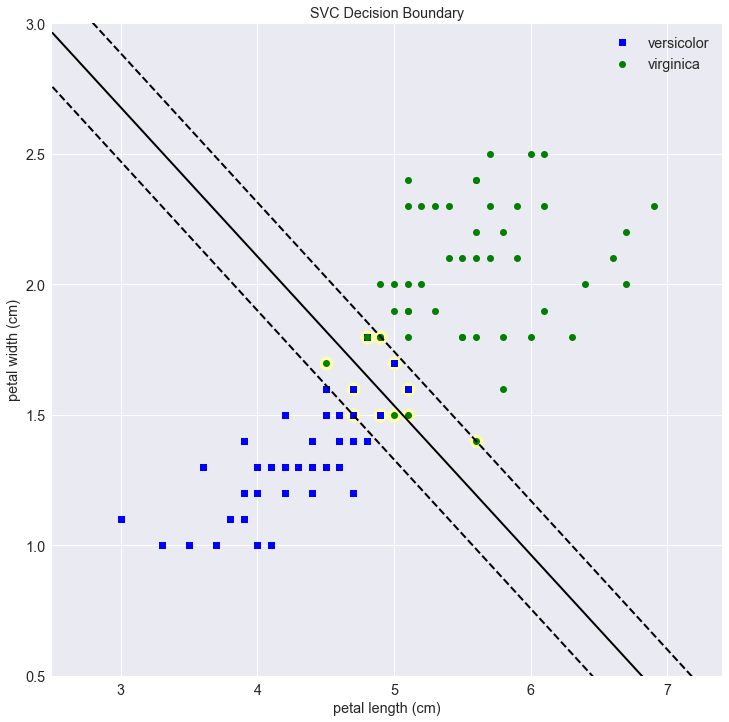

In [5]:
# axes limits for plotting
xlim = [min(X[:, 0]) - 0.5, max(X[:, 0]) + 0.5]
ylim = [min(X[:, 1]) - 0.5, max(X[:, 1]) + 0.5]

# create a plot
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
# plot and label the observations
ax.plot(X[:, 0][y==class0_idx], X[:, 1][y==class0_idx], "bs", label=iris.target_names[class0_idx])
ax.plot(X[:, 0][y==class1_idx], X[:, 1][y==class1_idx], "go", label=iris.target_names[class1_idx])
# plot the decision boundary
plot_svc_decision_boundary(svc, ax, xlim[0], xlim[1])
ax.set(xlim=xlim, ylim=ylim, title='SVC Decision Boundary')
ax.set(xlabel=iris.feature_names[feat0_idx], ylabel=iris.feature_names[feat1_idx])
ax.legend(loc='upper right');

### Soft Margin Classification

We fit two CVM classifiers with different values of the hyperparameter C.  
Then we plot the decision boundaries

In [6]:
C1 = 1
C2 = 100

scaler = StandardScaler()
svc1 = SVC(C=C1, kernel='linear', random_state=123)
svc2 = SVC(C=C2, kernel='linear', random_state=123)

svc1.fit(X, y)
svc2.fit(X, y);

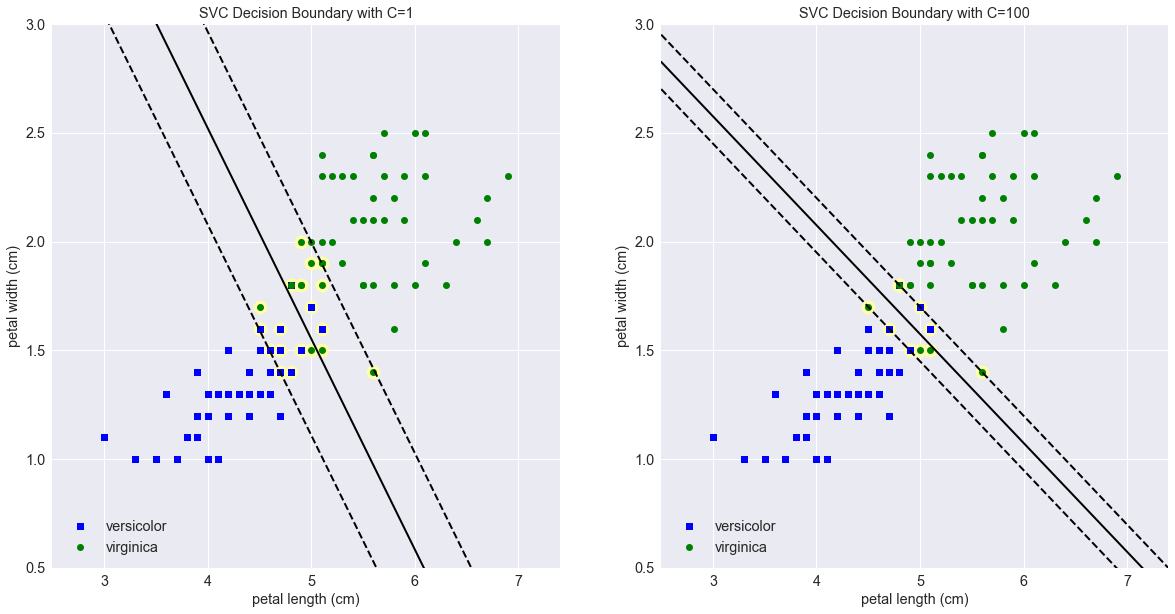

In [7]:
# create two subplots
fig, [ax1, ax2] = plt.subplots(ncols=2)

# left subplot
# plot and label the observations
ax1.plot(X[:, 0][y==class0_idx], X[:, 1][y==class0_idx], "bs", label=iris.target_names[class0_idx])
ax1.plot(X[:, 0][y==class1_idx], X[:, 1][y==class1_idx], "go", label=iris.target_names[class1_idx])
# plot the decision boundary
plot_svc_decision_boundary(svc1, ax1, xlim[0], xlim[1])
ax1.set(xlim=xlim, ylim=ylim, title='SVC Decision Boundary with C=' + str(C1))
ax1.set(xlabel=iris.feature_names[feat0_idx], ylabel=iris.feature_names[feat1_idx])
ax1.legend(loc='lower left')

# right subplot
# plot and label the observations
ax2.plot(X[:, 0][y==class0_idx], X[:, 1][y==class0_idx], "bs", label=iris.target_names[class0_idx])
ax2.plot(X[:, 0][y==class1_idx], X[:, 1][y==class1_idx], "go", label=iris.target_names[class1_idx])
# plot the decision boundary
plot_svc_decision_boundary(svc2, ax2, xlim[0], xlim[1])
ax2.set(xlim=xlim, ylim=ylim, title='SVC Decision Boundary with C=' + str(C2))
ax2.set(xlabel=iris.feature_names[feat0_idx], ylabel=iris.feature_names[feat1_idx])
ax2.legend(loc='lower left');

### Plotting the Separating Hyperplane

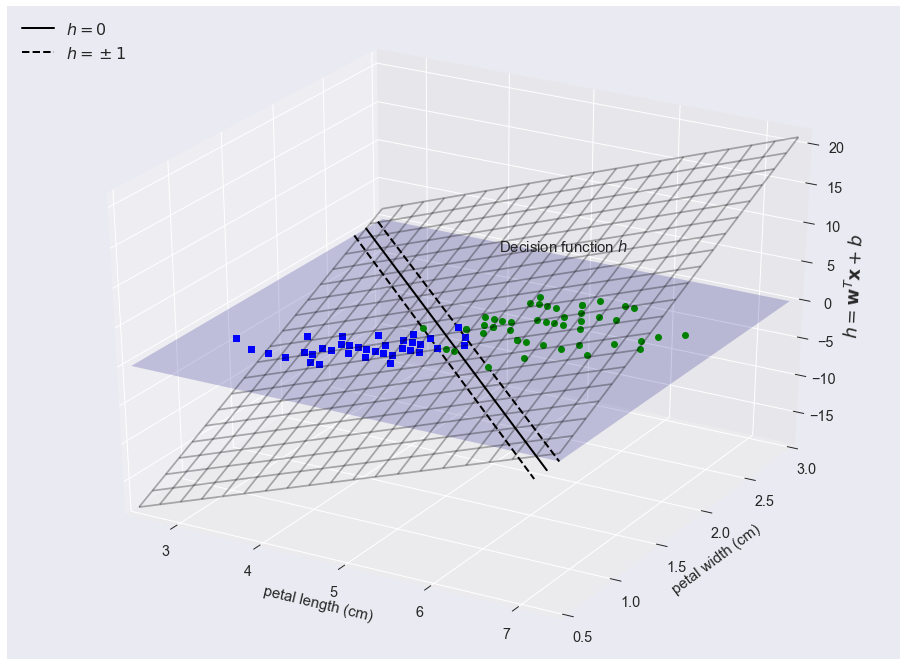

In [9]:
w=svc2.coef_[0]
b=svc2.intercept_[0]

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

x1_in_bounds = (X[:, 0] > xlim[0]) & (X[:, 0] < xlim[1])
X_crop = X[x1_in_bounds]
y_crop = y[x1_in_bounds]
x1s = np.linspace(xlim[0], xlim[1], 20)
x2s = np.linspace(ylim[0], ylim[1], 20)
x1, x2 = np.meshgrid(x1s, x2s)
xs = np.c_[x1.ravel(), x2.ravel()]
df = (xs.dot(w) + b).reshape(x1.shape)
m = 1 / np.linalg.norm(w)
boundary_x2s = -x1s*(w[0]/w[1])-b/w[1]
margin_x2s_1 = -x1s*(w[0]/w[1])-(b-1)/w[1]
margin_x2s_2 = -x1s*(w[0]/w[1])-(b+1)/w[1]
ax.plot_surface(x1s, x2, np.zeros_like(x1), color="b", alpha=0.2, cstride=100, rstride=100)
ax.plot(x1s, boundary_x2s, 0, "k-", linewidth=2, label=r"$h=0$")
ax.plot(x1s, margin_x2s_1, 0, "k--", linewidth=2, label=r"$h=\pm 1$")
ax.plot(x1s, margin_x2s_2, 0, "k--", linewidth=2)
ax.plot(X_crop[:, 0][y_crop==class1_idx], X_crop[:, 1][y_crop==class1_idx], 0, "go")
ax.plot_wireframe(x1, x2, df, alpha=0.3, color="k")
ax.plot(X_crop[:, 0][y_crop==class0_idx], X_crop[:, 1][y_crop==class0_idx], 0, "bs")
ax.axis(xlim + ylim)
ax.text(4.5, 2.5, 3.8, "Decision function $h$", fontsize=15)
ax.set_xlabel(iris.feature_names[feat0_idx], labelpad=10, fontsize=15)
ax.set_ylabel(iris.feature_names[feat1_idx], labelpad=10, fontsize=15)
ax.set_zlabel(r"$h = \mathbf{w}^T \mathbf{x} + b$", labelpad=10, fontsize=18)
ax.legend(loc="upper left", fontsize=16);